In [123]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import linear_algebra_library as linlib

from mpl_toolkits.mplot3d import Axes3D
import autograd.numpy as np
import time

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# import various other libraries e.g., for plotting, deep copying
import copy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import autograd.numpy as np

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
def plot_cost(g):
    '''
    A little plotting function
    '''
    # generate region of function to plot
    w_vals = np.linspace(-100,100,200)
    a,b = np.meshgrid(w_vals,w_vals)
    a.shape = (len(a)**2,1)
    b.shape = (len(b)**2,1)
    c = np.concatenate((a,b),axis = 1)
    g_vals = np.array([g(v) for v in c])
    a.shape = (len(w_vals),len(w_vals))
    b.shape = (len(w_vals),len(w_vals))
    g_vals.shape = (len(w_vals),len(w_vals))

    #### create figure and plot 
    fig = plt.figure(figsize = (5,5))
    gs = gridspec.GridSpec(1, 1) 

    # setup current axis
    ax1 = plt.subplot(gs[0],projection = '3d'); ax1.axis('off');

    # plot stuff
    ax1.plot_surface(a,b,g_vals,alpha = 0.1,color = 'r',rstride=5, cstride=5,linewidth=1,edgecolor = 'k')
    plt.show()

In [115]:
def plot_data(x,y):
    '''
    A little plotting function
    '''    
    #### create figure and plot 
    fig = plt.figure(figsize = (8,3))
    gs = gridspec.GridSpec(1, 1) 

    # setup current axis
    ax1 = plt.subplot(gs[0]);

    # plot stuff
    ax1.scatter(x,y,c = 'k',s = 70,edgecolor = 'w')
    plt.show()

# tanh least squares one dimensional cost

<IPython.core.display.Javascript object>


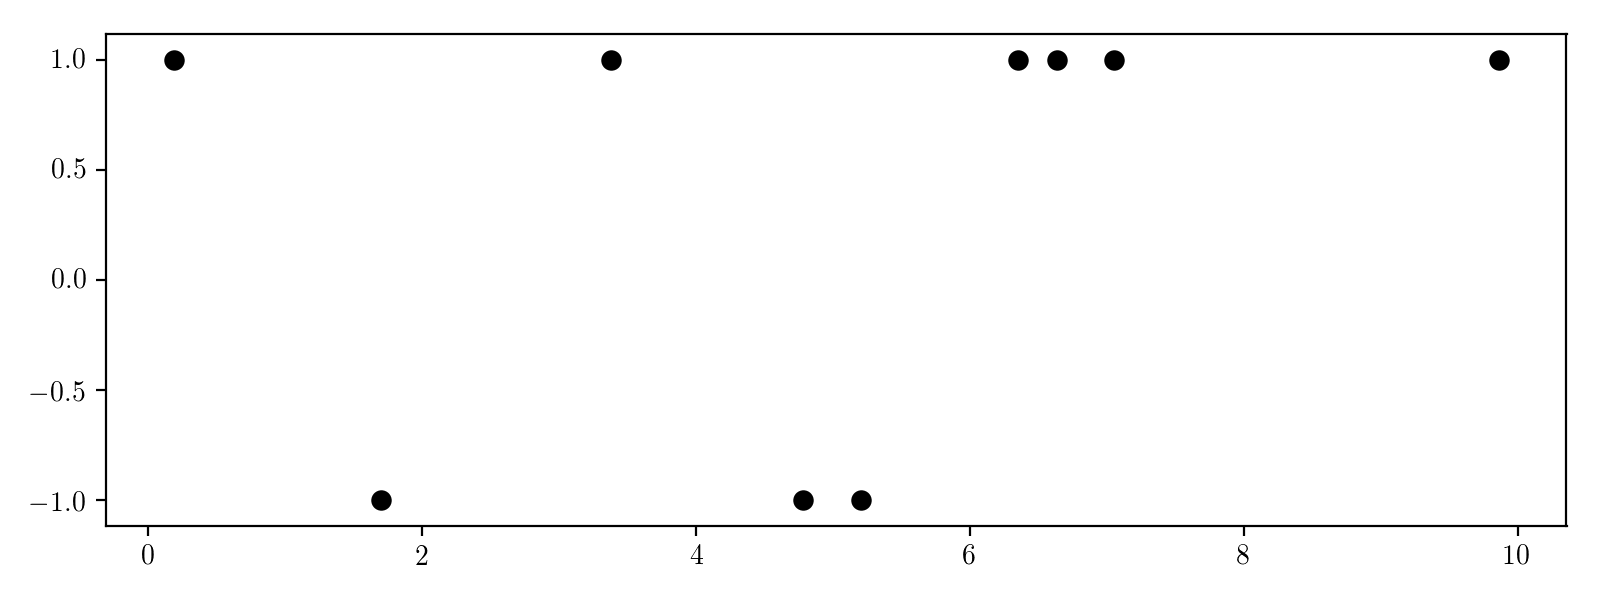

In [116]:
# define dataset
num_pts = 10
x = 10*np.random.rand(num_pts,1)
f = 2
y = np.sign(np.sin(f*x))
plot_data(x,y)

In [120]:
# tanh non-convex logistic least squares cost function
def tanh_ls(w):
    cost = 1/float(len(y))*np.sum(predict(w) - y)**2
    return cost

def count(w):
    cost = 0.25*np.sum(np.sign(w[0] + w[1]*x) - y)**2
    return cost

def predict(w):
    return np.tanh((w[0] + w[1]*x))

# tanh non-convex logistic least squares cost function
def tanh_least_squares(w):
    cost = np.sum(np.tanh(w[0] + w[1]*x) - y,axis = 0)**2
    return cost

<IPython.core.display.Javascript object>


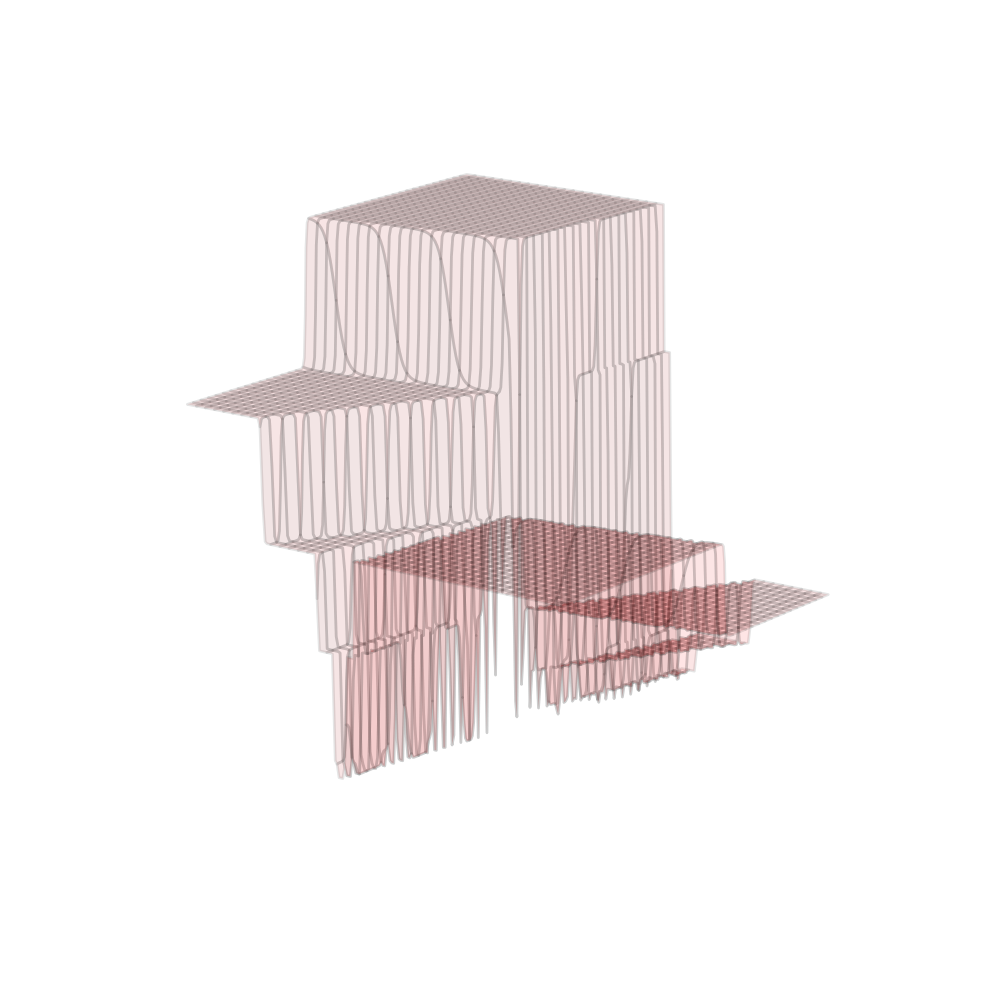

In [122]:
plot_cost(tanh_least_squares)

<IPython.core.display.Javascript object>


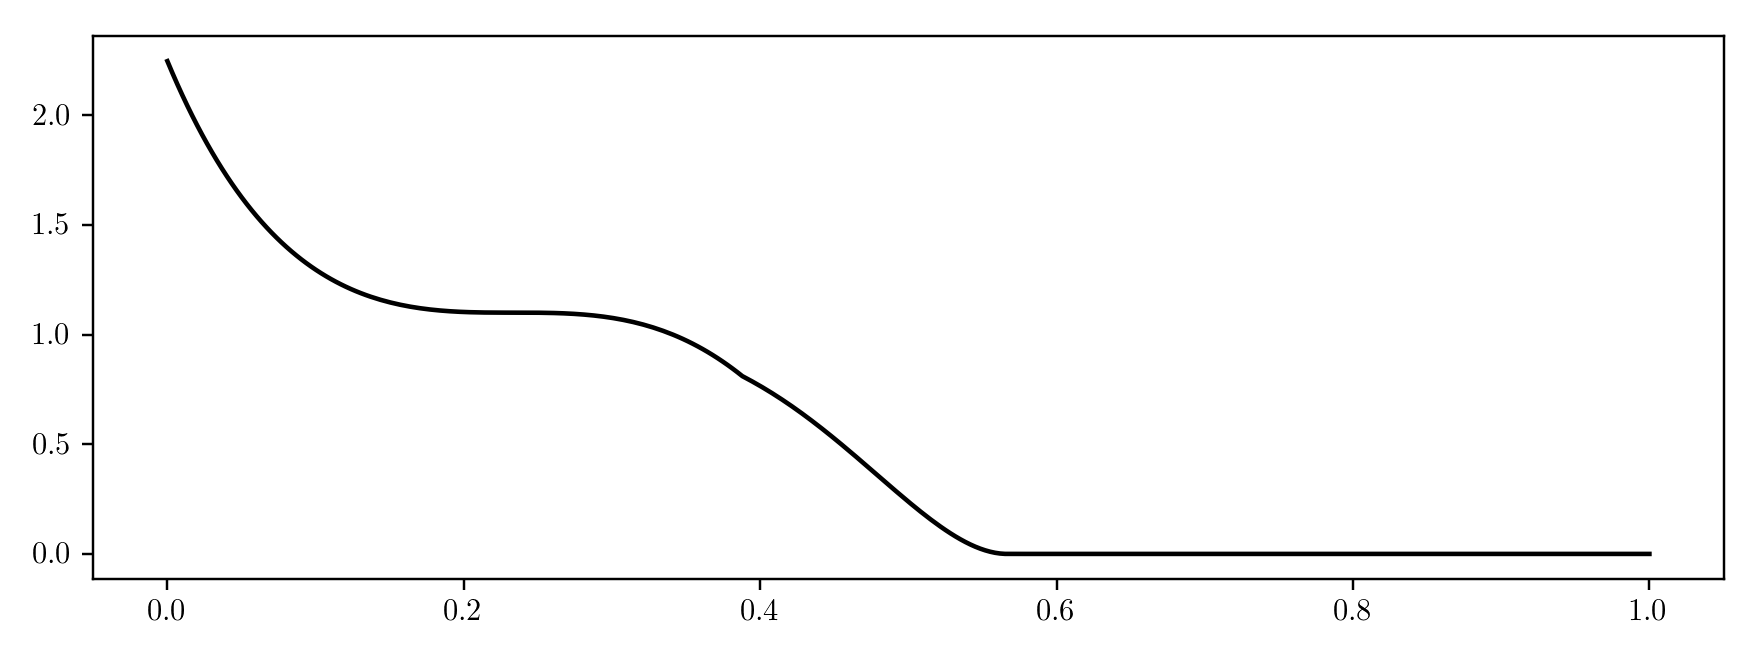

In [81]:
g = lambda w: np.maximum(0, (-3*w + 0.7)**3 + 1)**2 + np.maximum(0, (-3*w + 0.7)**3 + 0.1)
plot_cost(g)

<IPython.core.display.Javascript object>


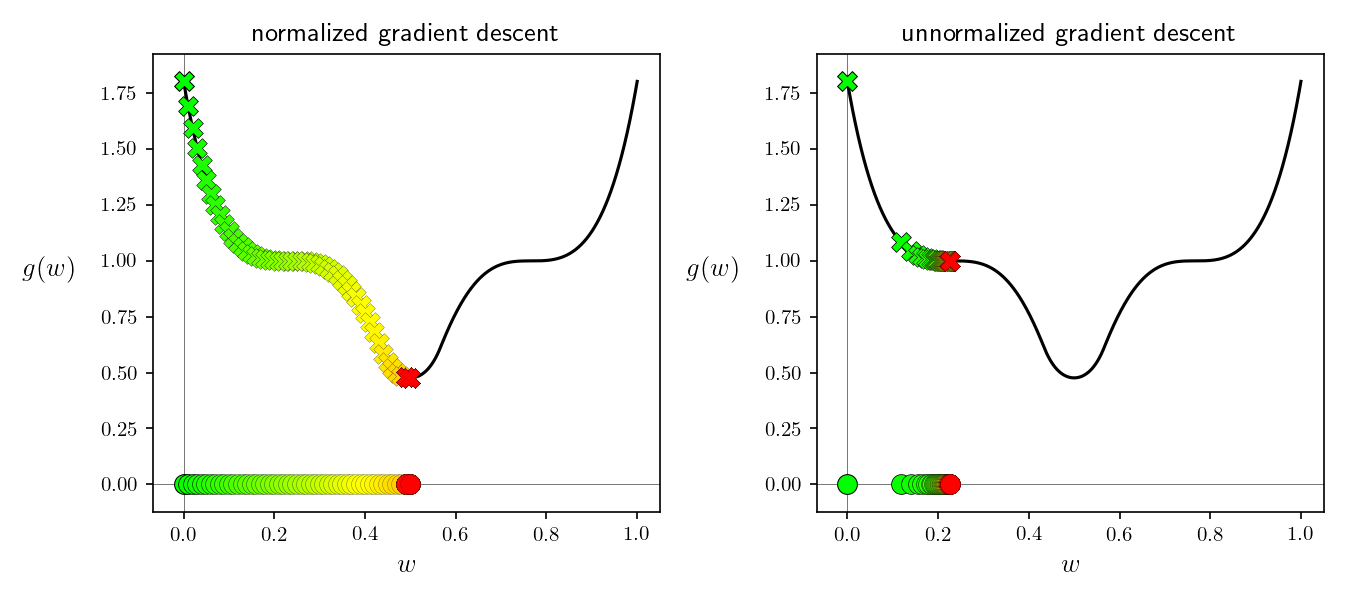

In [2]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.maximum(0,(3*w - 2.3)**3 + 1)**2 + np.maximum(0, (-3*w + 0.7)**3 + 1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.compare_versions_2d(g=g, w_init = 0,steplength = 0.01,max_its = 80,version = 'normalized',wmin = 0,wmax = 1)

<IPython.core.display.Javascript object>


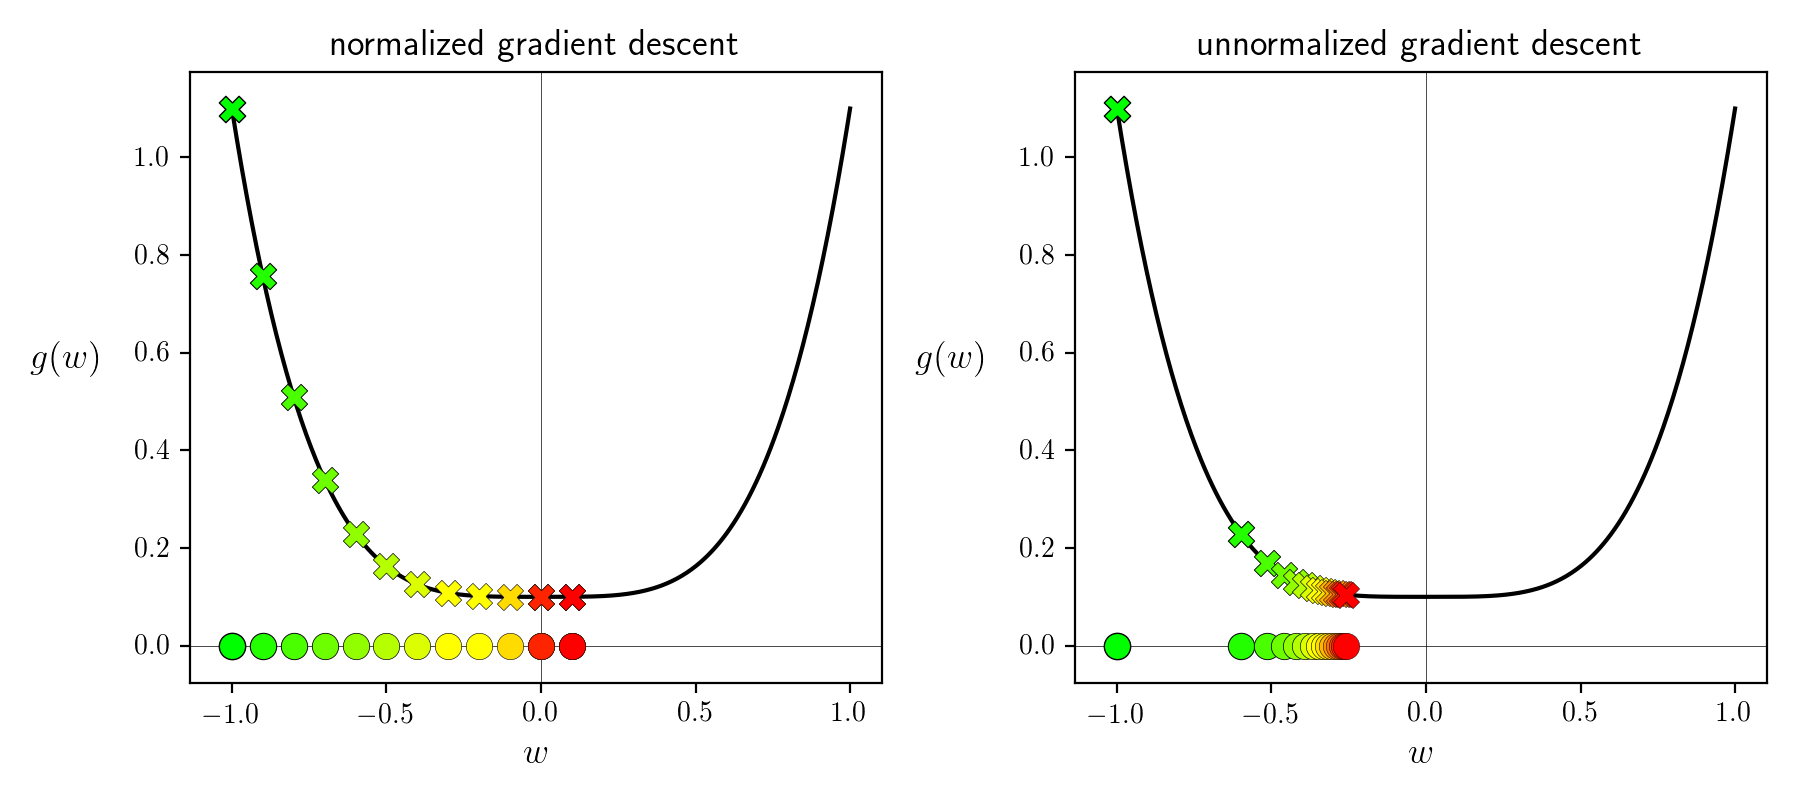

In [169]:
# what function should we play with?  Defined in the next line.
g = lambda w: 20*np.maximum(np.log(1 + np.exp(-w - 10)), np.log(1 + np.exp(w - 10)))
g = lambda w: w**4 + 0.1

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.compare_versions_2d(g=g, w_init = -1,steplength = 0.1,max_its = 15,version = 'normalized',wmin = -1,wmax = 1)

<IPython.core.display.Javascript object>


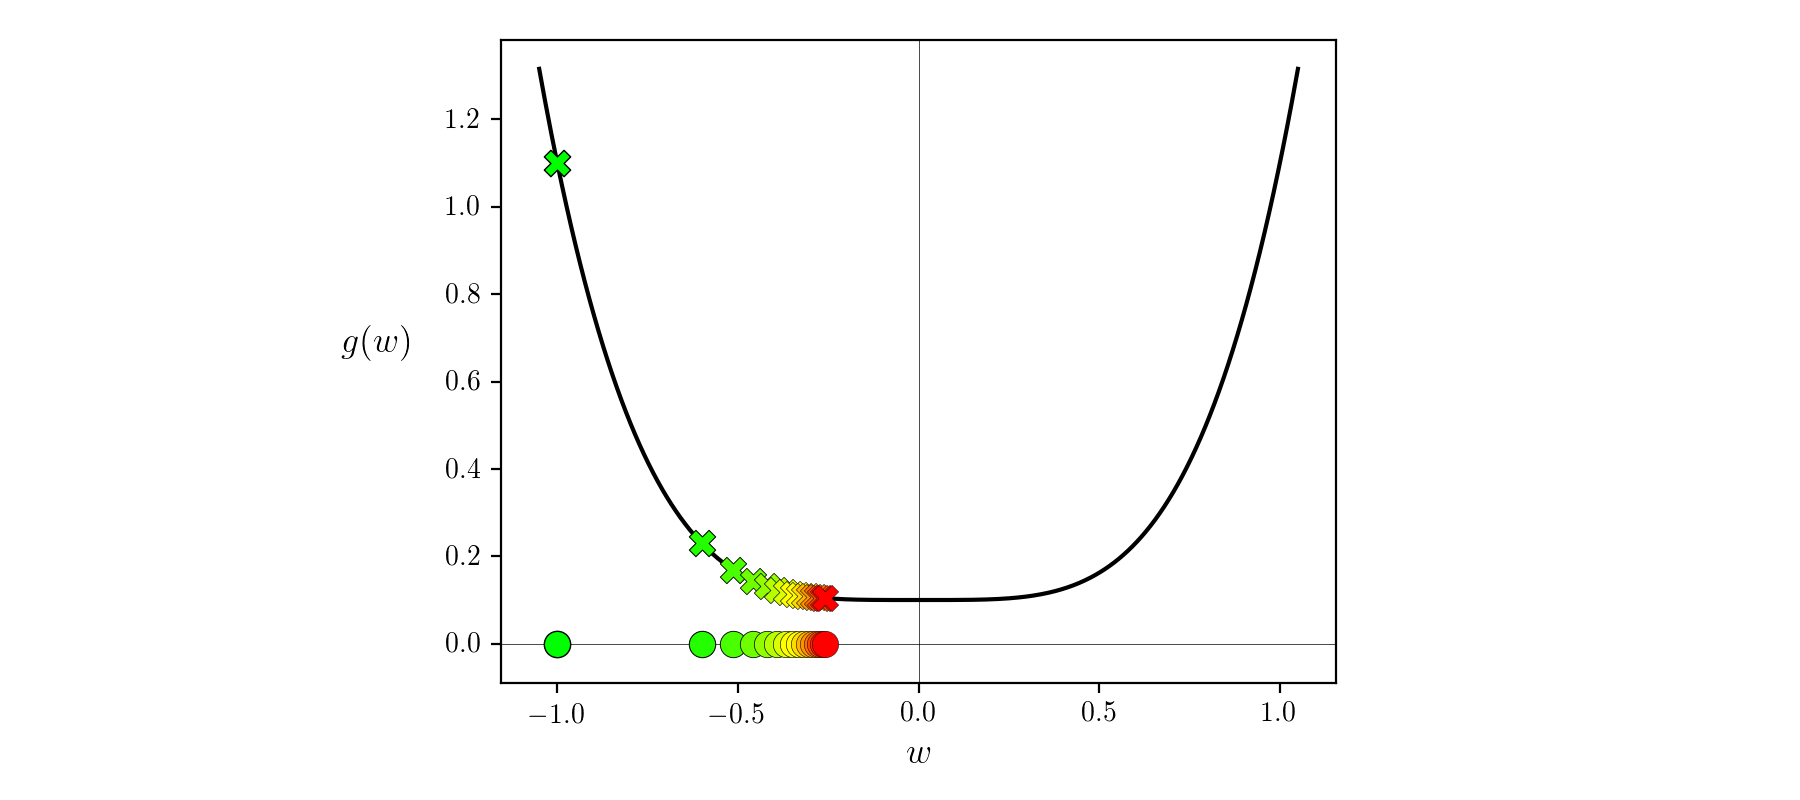

In [174]:
# what function should we play with?  Defined in the next line.
g = lambda w: w**4 + 0.1

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.draw_2d(g=g, w_inits = [-1.0],steplength = 0.1,max_its = 15,version = 'unnormalized',wmin = -1.05,wmax = 1.05)